In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

df = pd.read_csv('21BCE3252 DATASET.csv')

In [57]:
# Data Cleaning
df.replace('?', np.nan, inplace=True)
df[['Income', 'CCAvg', 'Mortgage', 'Experience']] = df[['Income', 'CCAvg', 'Mortgage', 'Experience']].astype(float)
df['Income'].fillna(df['Income'].mean(), inplace=True)
df['CCAvg'].fillna(df['CCAvg'].mean(), inplace=True)
df['Mortgage'].fillna(df['Mortgage'].mean(), inplace=True)
df['Experience'].fillna(df['Experience'].mean(), inplace=True)


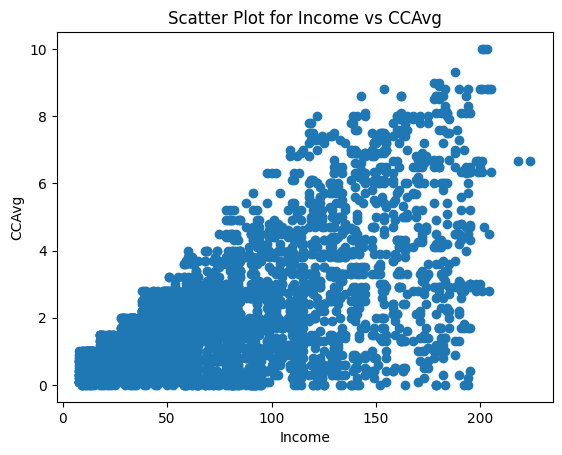

In [58]:
# Bivariate Analysis: Scatter Plot for Income vs CCAvg
plt.scatter(df["Income"], df["CCAvg"])
plt.title("Scatter Plot for Income vs CCAvg")
plt.xlabel("Income")
plt.ylabel("CCAvg")
plt.show()

In [59]:
# Correlation Calculation
corr = stats.pearsonr(df["Income"], df["CCAvg"])
print("p-value:", corr[1])
print("Correlation Coefficient:", corr[0])

p-value: 0.0
Correlation Coefficient: 0.6459836696249652


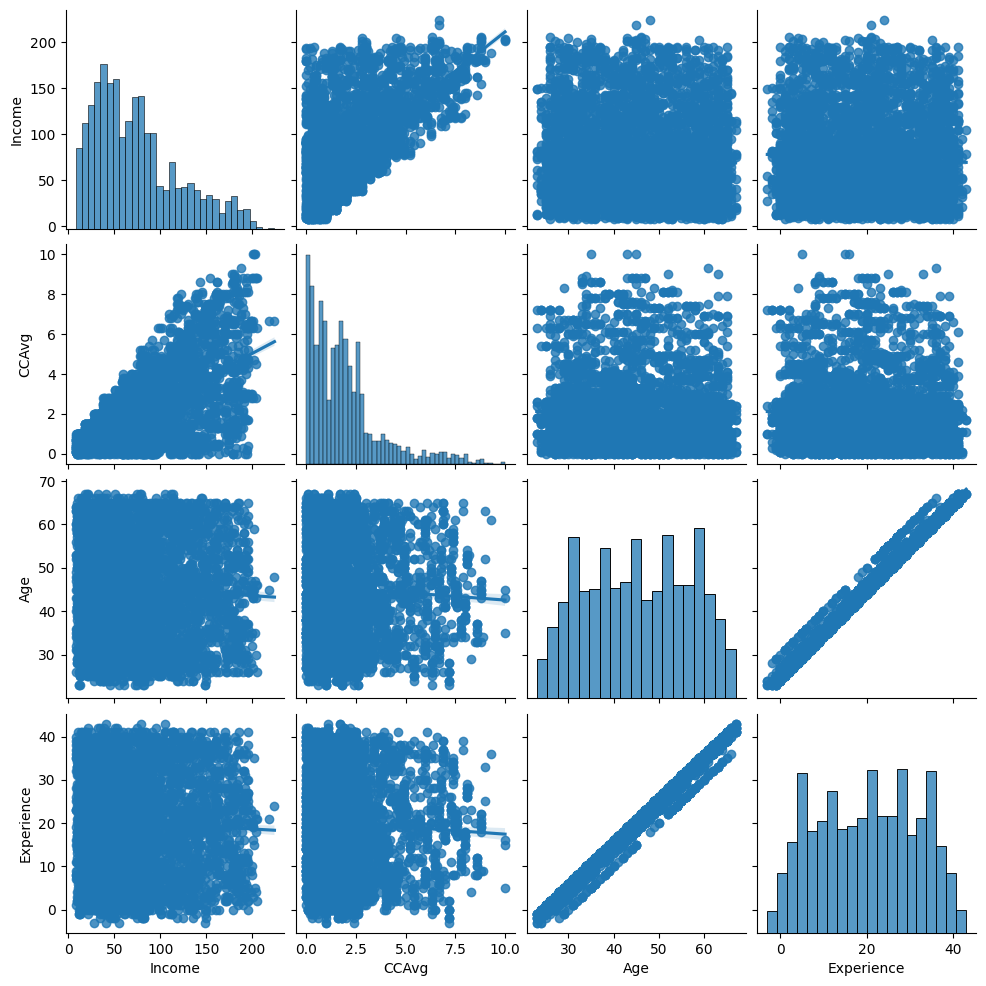

In [60]:
# Pair plot for selected variables
sns.pairplot(df[['Income', 'CCAvg', 'Age', 'Experience']], kind='reg')
plt.show()

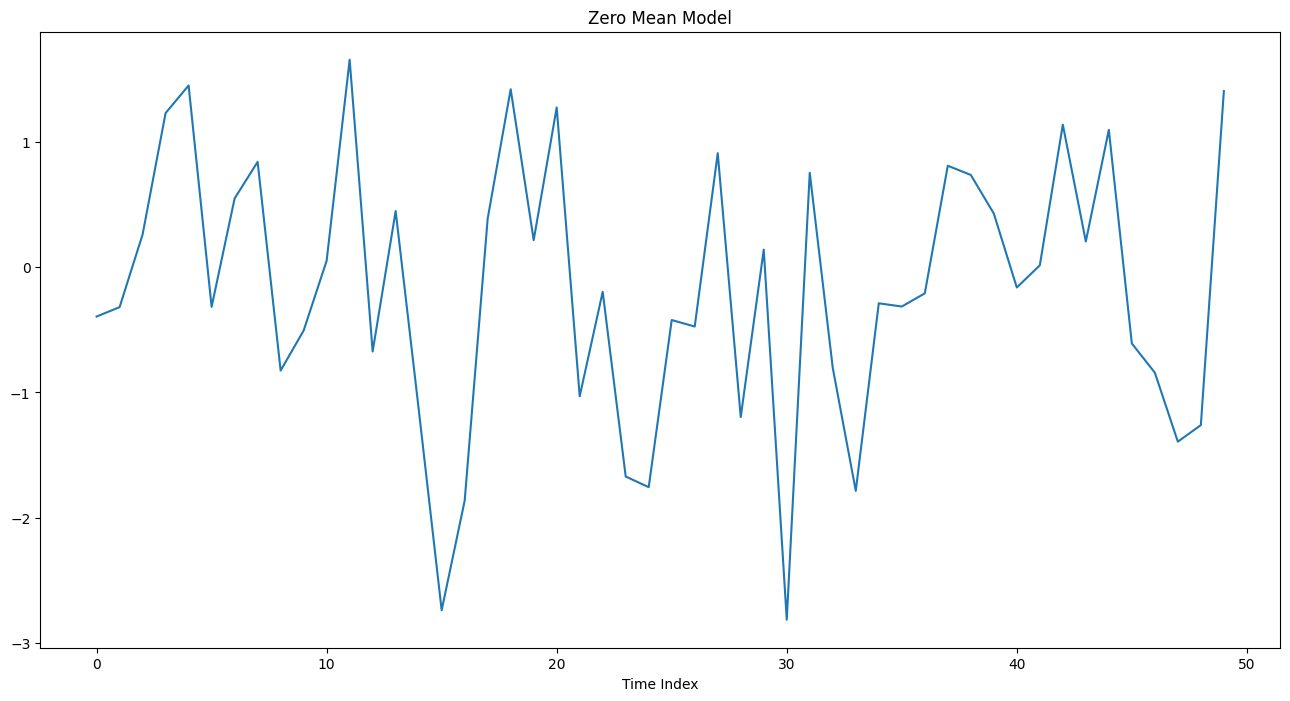

In [64]:
# Generate a zero-mean series
zero_mean_series = np.random.normal(loc=0.0, scale=1., size=50)
# Plotting the time series
plt.figure(figsize=(16, 8))
sns.lineplot(data=zero_mean_series)
plt.title('Zero Mean Model')
plt.xlabel('Time Index')
plt.show()

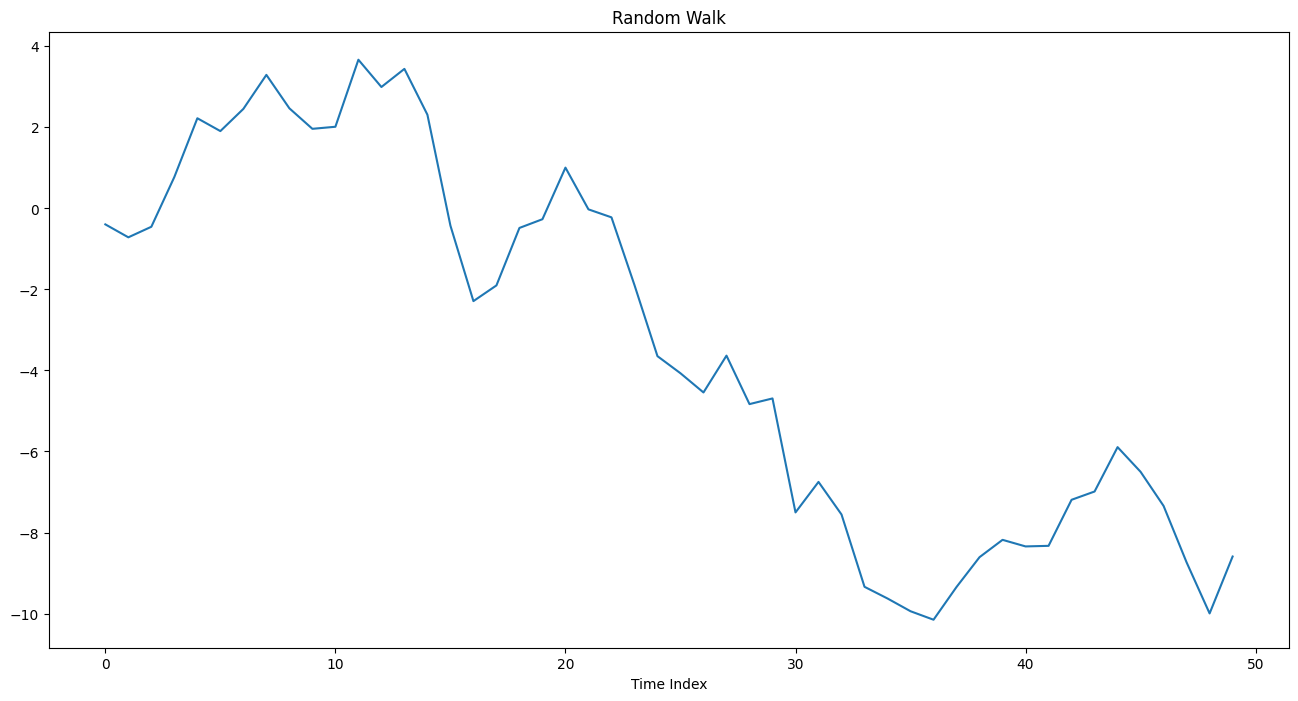

In [65]:
# Random Walk Generation
random_walk = np.cumsum(zero_mean_series)
# Plotting Random Walk
plt.figure(figsize=(16, 8))
sns.lineplot(data=random_walk)
plt.title('Random Walk')
plt.xlabel('Time Index')
plt.show()

In [66]:
# Simulating a time series dataset for demonstration
date_range = pd.date_range(start='2020-01-01', end='2020-12-31', freq='D')
df_power = pd.DataFrame({
    'Date': date_range,
    'Consumption': np.random.rand(len(date_range)) * 100,  # Random values for consumption
    'Solar': np.random.rand(len(date_range)) * 50,         # Random values for solar
    'Wind': np.random.rand(len(date_range)) * 50           # Random values for wind
})

In [67]:
# Convert 'Date' column to datetime format and set as index
df_power['Date'] = pd.to_datetime(df_power['Date'])
df_power.set_index('Date', inplace=True)


In [68]:
# Adding Year, Month, Weekday Name
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
df_power['Weekday Name'] = df_power.index.day_name()


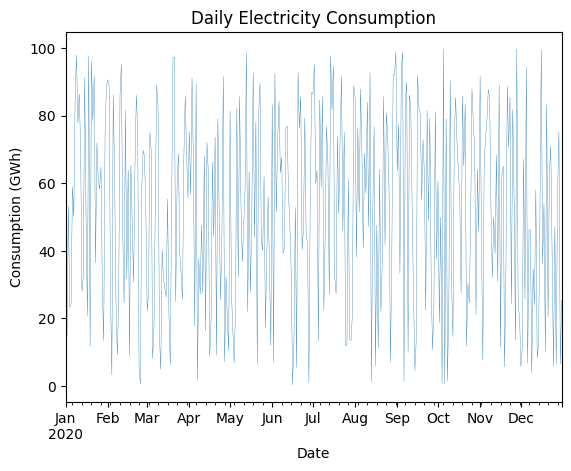

In [69]:
# Plot daily consumption
df_power['Consumption'].plot(linewidth=0.25)
plt.title('Daily Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption (GWh)')
plt.show()

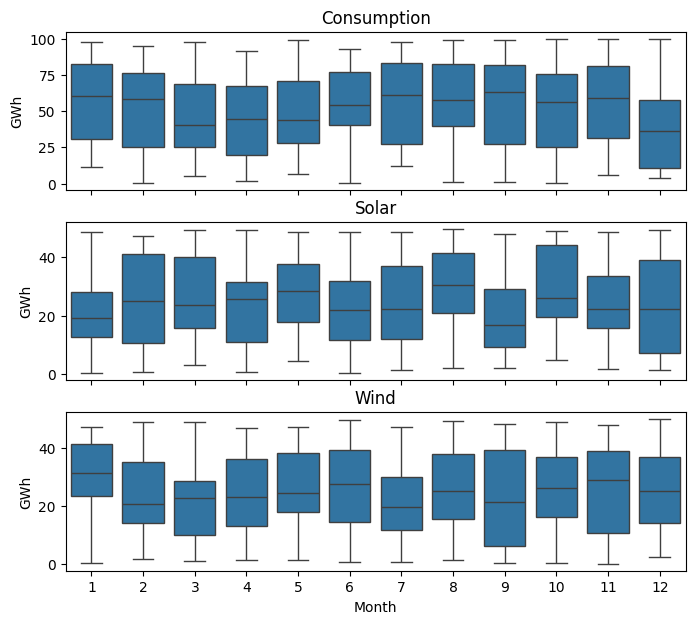

In [70]:
# Group by month and create boxplots
fig, axes = plt.subplots(3, 1, figsize=(8, 7), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=df_power, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)

In [73]:
# Resampling: Calculate weekly mean
power_weekly_mean = df_power[['Consumption', 'Wind', 'Solar']].resample('W').mean()
print(power_weekly_mean)

            Consumption       Wind      Solar
Date                                         
2020-01-05    35.301476  32.248392  25.636683
2020-01-12    75.508962  30.323674  17.772003
2020-01-19    47.455628  34.037330  21.293592
2020-01-26    70.561723  29.413418  16.893435
2020-02-02    64.295549  22.216157  26.994930
2020-02-09    34.074065  18.227854  24.021459
2020-02-16    61.249653  25.394979  26.017617
2020-02-23    54.308693  24.648536  28.477358
2020-03-01    39.497833  24.394016  22.357389
2020-03-08    48.784090  21.190314  36.444674
2020-03-15    32.798205  20.809795  18.598926
2020-03-22    50.980609  22.363379  24.368299
2020-03-29    54.131571  26.900382  26.760615
2020-04-05    61.492397  19.938785  25.476228
2020-04-12    42.694110  27.300094  27.228343
2020-04-19    41.427217  21.042347  20.097417
2020-04-26    53.460524  31.274495  19.388849
2020-05-03    27.963938  18.810426  23.255696
2020-05-10    45.835474  26.573601  33.418701
2020-05-17    52.637475  19.373862